# Data Input and preprocessing

In [1]:
import numpy as np
import sys
sys.path.append("..")
from function.real_data_function import loadData,showData,removenans, preprocessing, showDistribution, crossplot, output, plotResult
from function.function import kMeans, Kmeans_cluster_scores, plot_dimensionality_reduction, plot_cluster_distribution


## Load Data

In [2]:
data_vp = np.loadtxt('../realData/P-wave_output_monte_carlo_correct.xyz')
data_vs = np.loadtxt('../realData/S-wave_output_correct.xyz')
mask = np.loadtxt('../realData/S-wave_mask.xyz')
data = loadData(data_vp,data_vs,mask)

## Plot Input Data

Using function show_data() to draw each parameter of input data. 

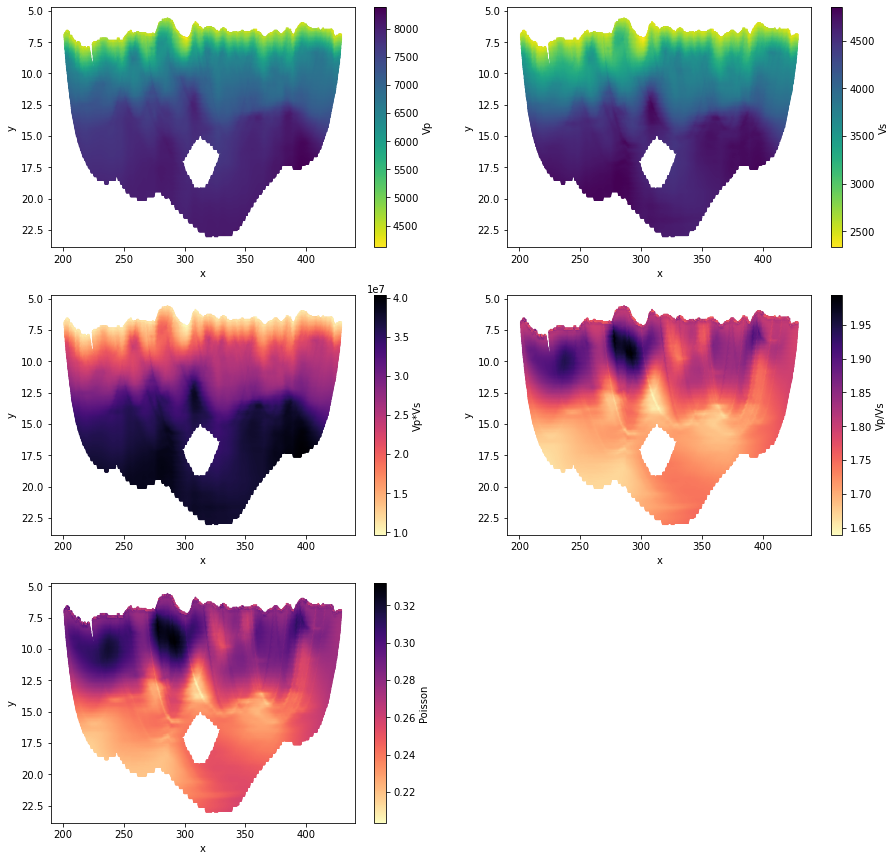

In [3]:
showData(data)

Using removenans() to remove points with nan values from array. 

- new_data is the original data saved in the form of np.array.

- data_noNan removes nan values from new_data. 

- nan_list is the list of nan values index.

In [4]:
data_noNan,nan_list = removenans(data)

Using showDistribution() to show the distribution of each parameter(except x and z)

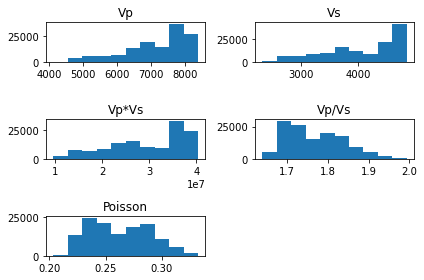

In [5]:
showDistribution(data)

Using crossplot to plot the cross-plot (scatter plot) of each pair of physical properties (other parameters and vp)

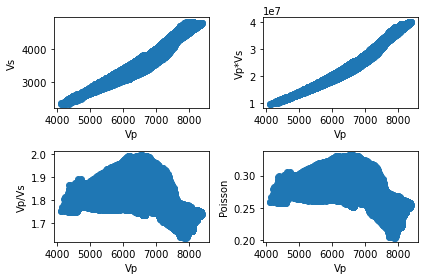

In [6]:
crossplot(data)

## Data Preprocessing

Using preprocessing() to make data standardized

In [7]:
# remove the mean
# divide by the variance

data_preprocessing = preprocessing(data_noNan) 


## Plot Data after Preprocessing

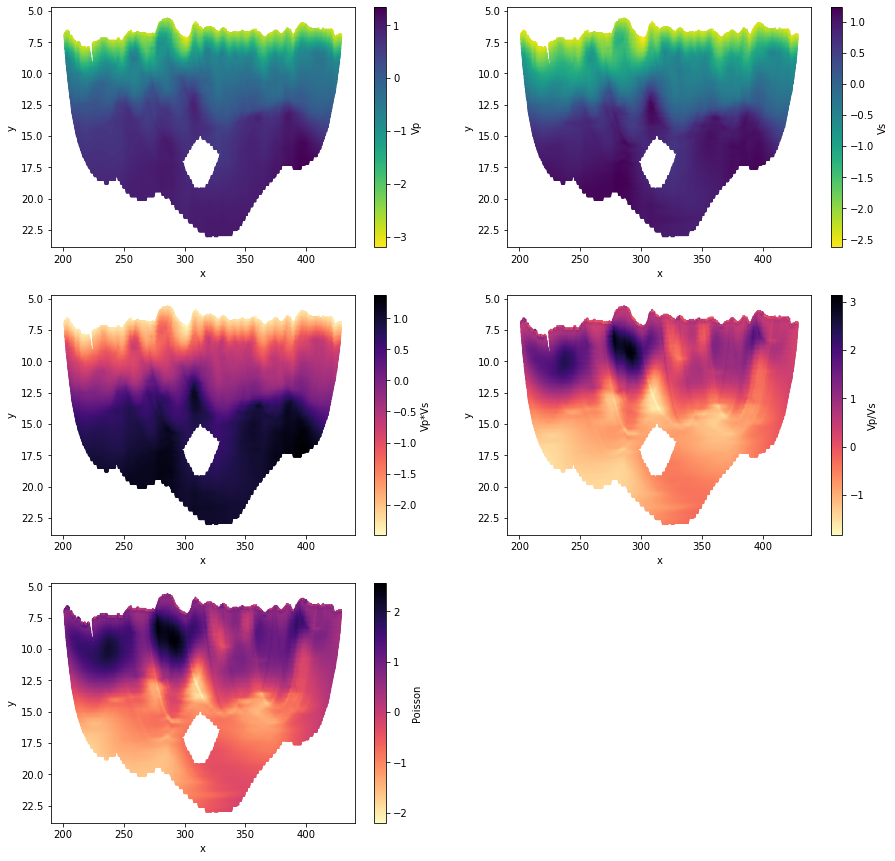

In [8]:
showData(data_preprocessing)

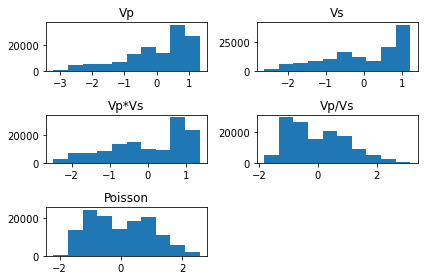

In [9]:
showDistribution(data_preprocessing)

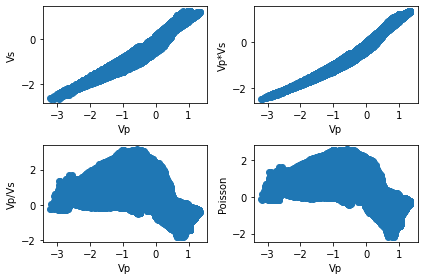

In [10]:
crossplot(data_preprocessing)

## KMeans

Using KMeans() to divide data in clusters.

- result_k is the result of KMeans and data_preprocessing is normalized data without nan values

Using plotResult() to show the result of clusters.

- data_noNan removes nan values from original data
- result_k is labels for data without nan values after Kmeans

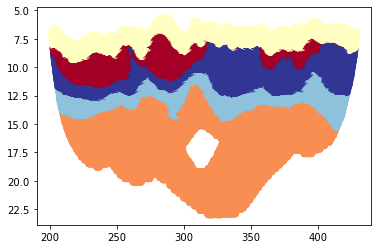

In [11]:
result_k = kMeans(5, data_preprocessing[:,:-3])
plotResult(data_noNan,result_k)

## Tuning Parameters

Using Kmeans_cluster_scores() to plot Calinsky-Harabasz score, Silhouette score score and Davies-Bouldin score with the number of clusters changing.

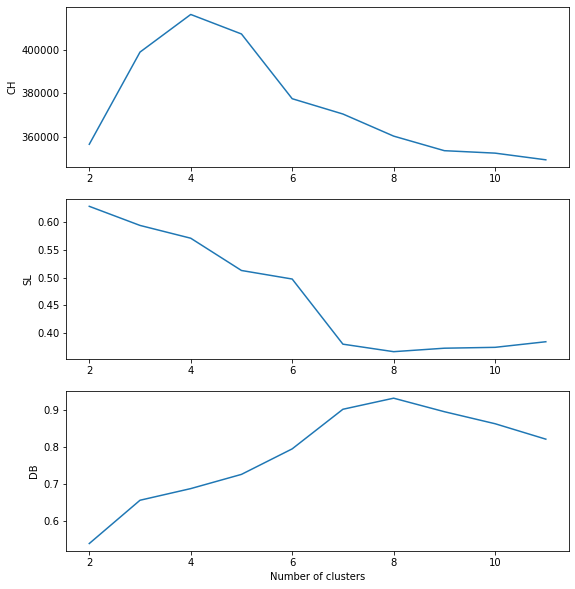

In [12]:
Kmeans_cluster_scores(data_preprocessing[:,:-3])

Plotting result of best parameters.
KMeans() have two parameters.
- The first one is the number of clusters.
- The second one is dataset.

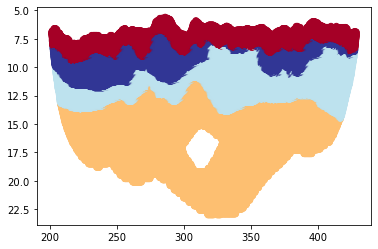

In [11]:
result_k = kMeans(4, data_preprocessing[:,:-3])
plotResult(data_noNan,result_k)

<function matplotlib.pyplot.show(close=None, block=None)>

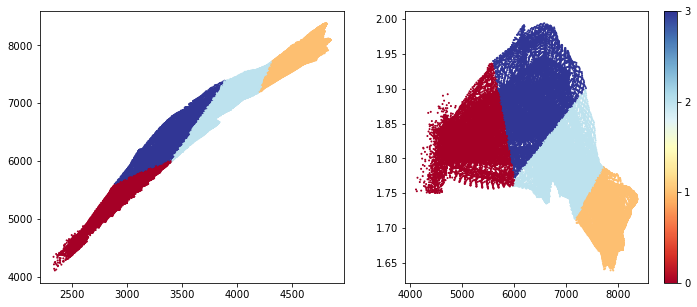

In [14]:
from matplotlib import pyplot as plt
fig, axarr = plt.subplots(1, 2, figsize=(12, 5))
a=axarr[0].scatter(data_noNan[:,1],data_noNan[:,0],c=result_k,cmap=plt.cm.RdYlBu,s=1)
b=axarr[1].scatter(data_noNan[:,0],data_noNan[:,3],c=result_k,cmap=plt.cm.RdYlBu,s=1)
cb = fig.colorbar(a,ax=axarr[1],ticks=np.arange(np.min(result_k),np.max(result_k)+1))

plt.show

## Dimensionality Reduction

Using plot_dimensionality_reduction() to plot the cluster result after dimensionality reduction.

It has two parameters:

- The first one is dataset
- The second one is cluster result

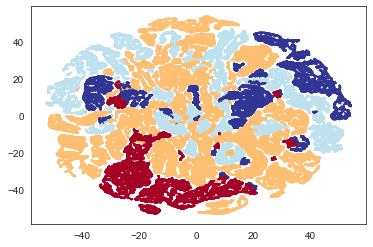

In [ ]:
plot_dimensionality_reduction(data_preprocessing[:,:-3],result_k)

## Cluster Distribution

Using plot_cluster_distribution() to plot the distribution of clusters.

3
[-1.5 -0.5  0.5  1.5  2.5  3.5]


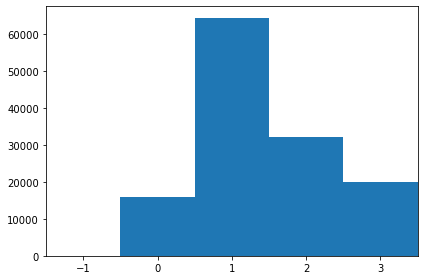

In [17]:
plot_cluster_distribution(result_k)

## Testing with Various Input Parameters

Testing with different sets of characteristics.

Dataset has 7 characteristics called Vp, Vs, Vp*Vs, Vp/Vs, Poisson's ratio, x, z, and the index of them is 0, 1, 2, 3, 4, 5, 6.

In [18]:
testData1 = data_preprocessing[:,[0,1,3]]
testData2 = data_preprocessing[:,[0,1]]

- testData1 selects Vp, Vs and Vp/Vs.
- testData2 selectes Vp and Vs.

## Vp, Vs, Vp/Vs

### KMeans

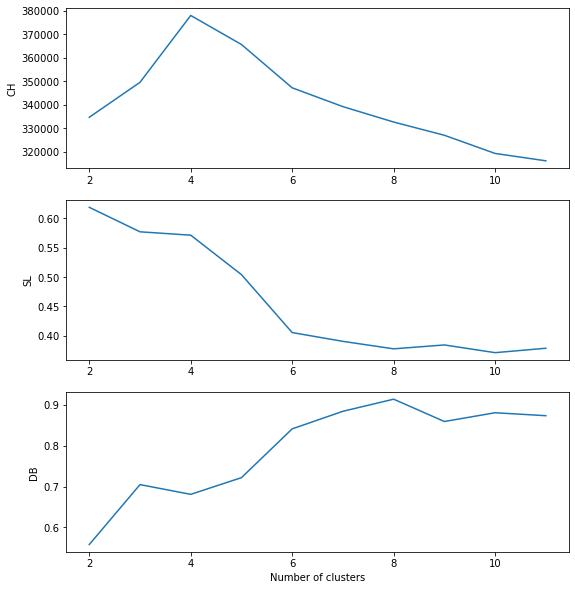

In [19]:
Kmeans_cluster_scores(testData1)

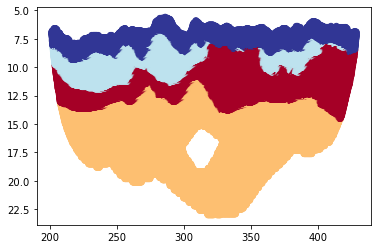

In [20]:
result_k = kMeans(4, testData1)
plotResult(data_noNan,result_k)

## Vp, Vs

### KMeans

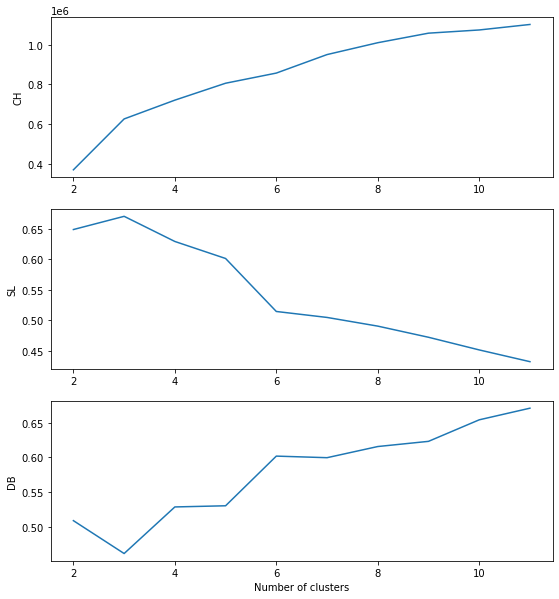

In [22]:
Kmeans_cluster_scores(testData2)

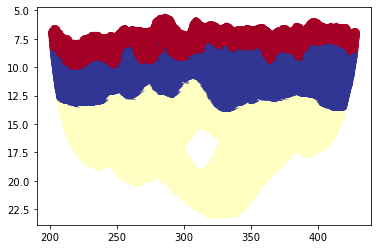

In [23]:
result_k = kMeans(3, testData2)
plotResult(data_noNan,result_k)